In [1]:
%pylab inline
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


# Quick introduction of the idea

Convolutional-type Constraint
-----------
Our goal is to construct a density field realization $f(\mathbf x)$ subject to a set of $M$ constraints:

$$\Gamma = \{ C_i \equiv C_i [f; \mathbf r_c] = c_i; i = 1,...,M \}$$

The constraint $C_i[f;\mathbf r_c]$ can be viewed as a functional of the $f(\mathbf x)$ field to have specific value $c_i$ at position $\mathbf x = \mathbf r_c$.
We only consider linear functionals of the field, that the constraint value $c_i$ is obtained by convolving the $f(\mathbf x)$ field with some kernel $H_i(\mathbf x, \mathbf r_c)$ leading to the convolved field value at position $\mathbf r_c$.
We can write $C_i$ in the form of:
$$C_i[f;\mathbf r_c] = \int d\mathbf{x} f(\mathbf x) H_i(\mathbf x, \mathbf r_c) = \int \frac{d \mathbf{k}} {(2 \pi)^3} \hat{f}(\mathbf k) H^{*}_i (\mathbf k, \mathbf r_c) = c_i$$

As an simple example below, we convolve the linear density field (2D projection) with a simple Gaussian kernel of width 1 Mpc/h and aim to constrain/specify the convolved value at center $\mathbf r_c$ to be $c_i$

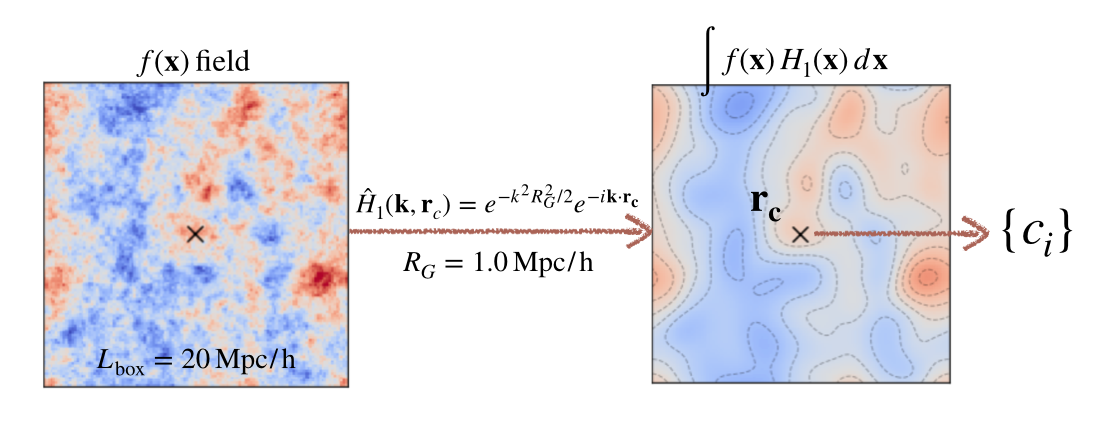

In [2]:
Image(filename='convolve.png', width=600) 

Ensemble Mean Field $\bar{f}_{\Gamma}(\mathbf x)$
---------------------

Given a certain constraint set $\Gamma$, one can build a corresponding "ensemble mean field" via:

$$\bar{f_{\Gamma}}(\mathbf x) \equiv <f(\mathbf x)|\Gamma> = \xi_i(\mathbf x) \xi^{-1}_{ij} c_j$$

where $\xi_i(\mathbf x) = <f(\mathbf x)C_i[f;\mathbf r_c]>$ is the average of the cross-correlation between the $f(\mathbf x)$ field and the $i$th constraint $C_i$, and $\xi^{-1}_{ij}$ is the ($ij$) th element of the inverse of constraint's covariance matrix $<C_i C_j>$. 

Using the definition of the matter power spectrum $P(k)$,
$$(2\pi)^3 P(k_1) \delta_D(\mathbf k_1 - \mathbf k_2) = <\hat{f}(\mathbf k_1) \hat{f}^{*}(\mathbf k_2)>$$

we can write down the formalism for $\xi_i(\mathbf x)$ and $\xi_{ij}$ as follows:


\begin{equation}\label{equation:xi_i}
\begin{split}
\xi_i(\mathbf x) & \equiv <f(\mathbf x) C_i[f;\mathbf r_c]> \\ 
& = <\int \frac{d \mathbf{k_1}} {(2 \pi)^3} \hat{f}(\mathbf k_1) e^{i \mathbf k_1 \cdot \mathbf x}  \int \frac{d \mathbf{k_2}} {(2 \pi)^3} \hat{f}^{*}(\mathbf k_2) H_i (\mathbf k_2,\mathbf r_c)> \\
&= \int \frac{d \mathbf{k_1}} {(2 \pi)^3} \frac{d \mathbf{k_2}} {(2 \pi)^3} <\hat{f}(\mathbf k_1) \hat{f}^{*}(\mathbf k_2)> H_i (\mathbf k_2, \mathbf r_c) e^{i \mathbf k_1 \cdot \mathbf x} \\
&= \int \frac{d \mathbf{k}} {(2 \pi)^3} P(k) \hat{H}_i(\mathbf k, \mathbf r_c) e^{i \mathbf{k} \cdot \mathbf x}
\end{split}
\end{equation}


and 


\begin{equation}\label{equation:xi_ij}
\begin{split}
\xi_{ij} & \equiv <C_i[f;\mathbf r_c] C_j[f;\mathbf r_c]> \\
&= <\int \frac{d \mathbf{k_1}} {(2 \pi)^3} \hat{f}(\mathbf k_1) H^{*}_i (\mathbf k_1, \mathbf r_c) \int \frac{d \mathbf{k_2}} {(2 \pi)^3} \hat{f^*}(\mathbf k_2) H_j (\mathbf k_2, \mathbf r_c)> \\
&= \int \frac{d \mathbf{k}} {(2 \pi)^3} \hat{H}^{*}_i (\mathbf k, \mathbf r_c) \hat{H}_j (\mathbf k, \mathbf r_c) P(k)
\end{split}
\end{equation}



Intuitively, the ensemble mean field $\bar{f_{\Gamma}}(\mathbf x)$ can be interpreted as the "most likely" field subject to the set of constraints $\Gamma$. 

For example, the field shown below is the ensemble mean field corresponding to a 3$\sigma_0$ peak at the center of the box:

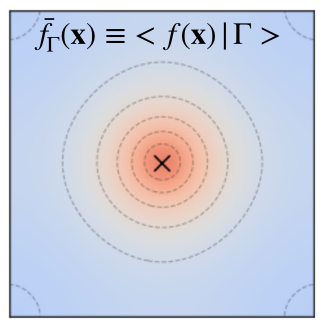

In [3]:
Image(filename='ensemble-mean.png', width=180) 

With a combination of different types of constraints $C_i$ (with kernel $H_i(\mathbf k)$), we can construct ensemble mean field that specifies the shape (left plot), peculiar velocity (middle) and tidal field (right) at the site of the peak. See ``Build_Ensemble_Mean_Field`` in the tutorial for further details.

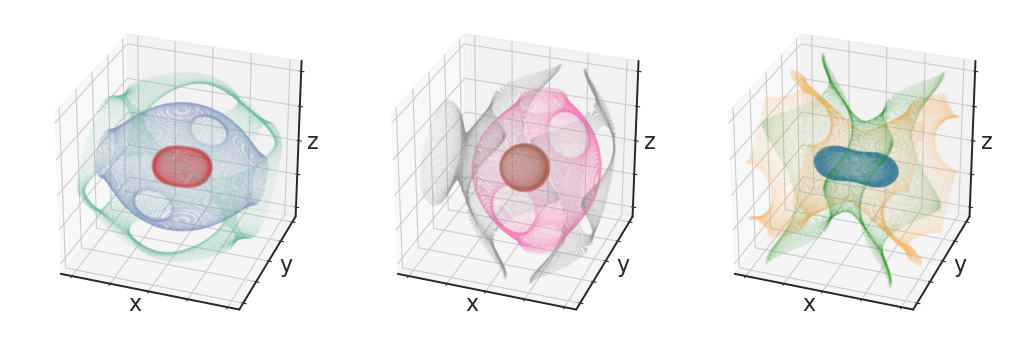

In [4]:
Image(filename='contour3D-ensemble.png', width=600) 
# a 3D illustration of the ensemble mean field constructed via different constraints

Construct a constrained realization
---------------

The CR formalism further introduces the "residual field" $F(\mathbf x) \equiv f(\mathbf x) - \bar{f_{\Gamma}}(\mathbf x)$ as the difference between an arbitrary Gaussian realization $f(\mathbf x)$ satisfying the constraint set $\Gamma$ and the ensemble mean field $\bar{f_{\Gamma}}(\mathbf x)$ of all those fields.
The crucial idea behind the CR construction method is based on the fact that, the complete probability distribution $\mathscr{P} [F|\Gamma]$ of the residual field $F(\mathbf x)$ is independent of the numerical values $c_i$ of the constraints $\Gamma$.  

i.e., for any $\Gamma_1$, $\Gamma_2$, we have

\begin{equation}
\mathscr{P} [F|\Gamma_1] = \mathscr{P} [F|\Gamma_2]
\end{equation}

Therefore, one can construct the desired realization under constraint sets $\Gamma$ by properly sampling a residual field $F(\mathbf x)$ from a random, unconstrained realization $\tilde{f} (\mathbf x)$ and then adding that $F(\mathbf x)$ to the ensemble field $\bar{f_{\Gamma}}(\mathbf x)$ corresponding to $\Gamma$. 


The formalism can be written as:
\begin{equation}
\label{equation:construct_fx}
\begin{split}
f(\mathbf x) & = F(\mathbf x) + \bar{f}_{\Gamma}(\mathbf x) \\
&= (\tilde{f} (\mathbf x) - \bar{f}_{\tilde{\Gamma}}(\mathbf x)) + \bar{f}_{\Gamma}(\mathbf x) \\ 
&= (\tilde{f} (\mathbf x) - \xi_i(\mathbf x) \xi^{-1}_{ij} \tilde{c}_j)  + \xi_i(\mathbf x) \xi^{-1}_{ij} c_j \\
&= \tilde{f} (\mathbf x)  + \xi_i(\mathbf x) \xi^{-1}_{ij} (c_j - \tilde{c}_j)
\end{split}
\end{equation}

i.e., we are treating the original $\tilde{f}(\mathbf x)$ as a field subject to constraint sets $\tilde{\Gamma}$ with value $\tilde{c}_j = C_j [\tilde{f}; \mathbf r_c]$, ($\tilde{c}_j$ is the original value of the unconstrained field), and $\bar{f}_{\tilde{\Gamma}}(\mathbf x) = \xi_i(\mathbf x) \xi^{-1}_{ij} \tilde{c}_j$ is the ensemble mean field corresponding to $\tilde{\Gamma}$.
From $\tilde{f}(\mathbf x) - \bar{f}_{\tilde{\Gamma}}(\mathbf x)$ we get the residual field $F(\mathbf x)$ from a random unconstrained realization, and adding that to $\bar{f}_{\Gamma}(\mathbf x)$ results in the field $f(\mathbf x)$ satisfying constraint $\Gamma$.

Below is an illustration of the procedure:

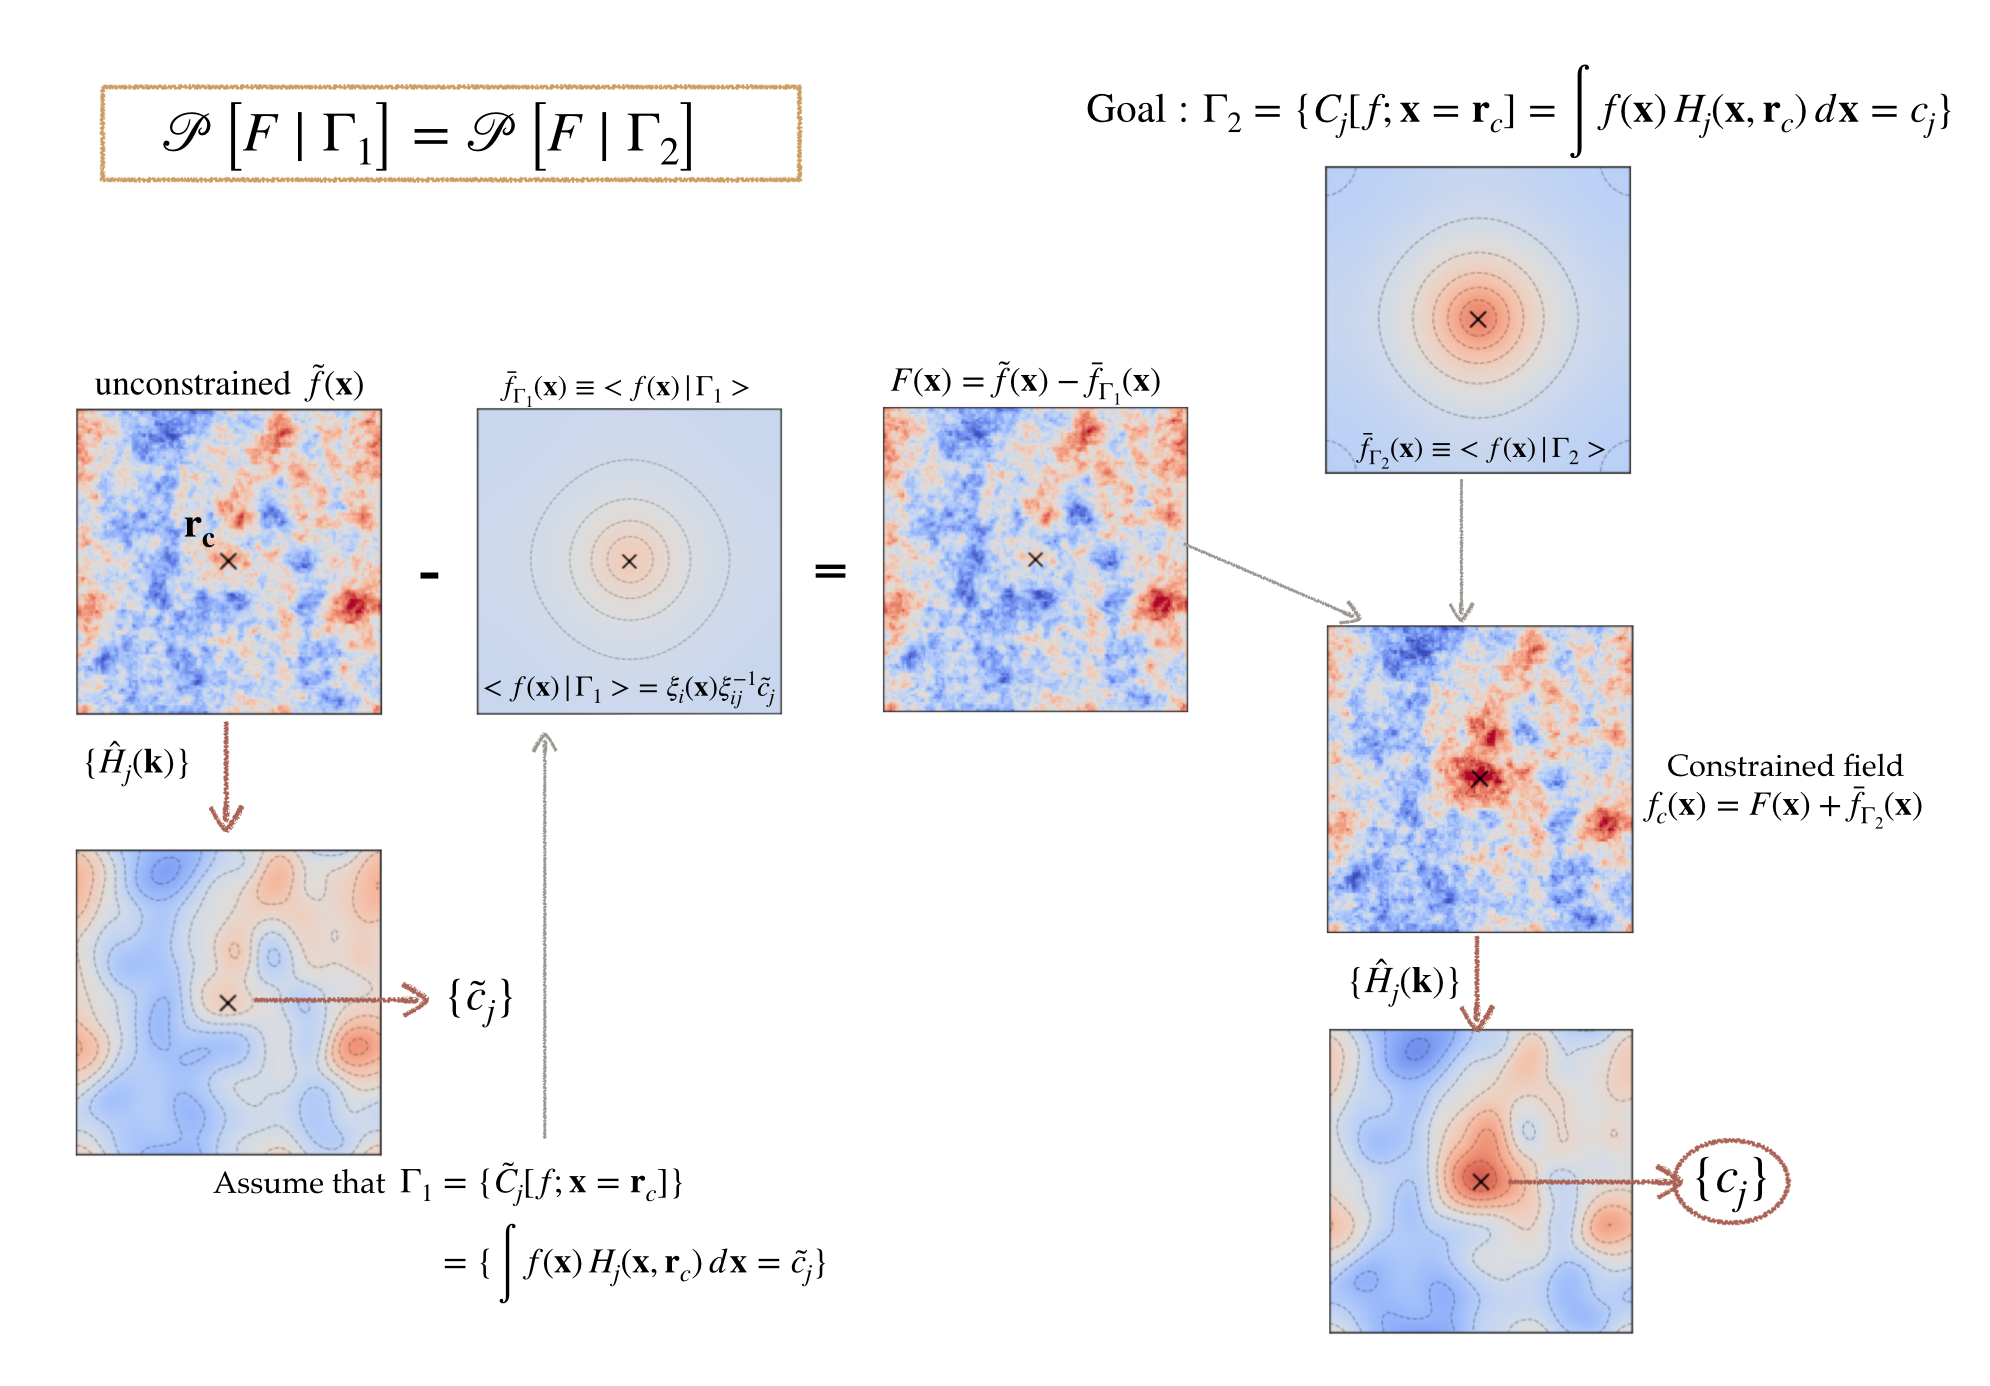

In [5]:
Image(filename='apply-constraint.png', width=900) 